Introduction of Time Series
Dataset is from SFO Airport from Kaggle. 

Goal is to predict the number of passengers who will visit the airport in future years

What is Time Series:
Data that is collected over time and is dependent on it
eg. Stock Price, number of visitors, sales data, etc.
 Importance of timeseries analysis and forecasting:
 Problem statement - if you want any investment to be made in an organization, 
 say, EV's, we will be looking for:
 Sales, Previous revenue in the organization, financial projections
consumption of EV's in next 5-10 yrs - Demand
how demands will be coming in - look at past 5 yrs of products sold
From this, forecast what the demand will be in the next 10 yrs.
if profitble, I will make investment
THis scenario - anayze past data observations and predict future values
thru time series forecasting

Use passenger Dataset to forecast the number of passengers for the upcoming years

For Pandemic COVID-19, the time series forecasting was used to predict.
Casualty, Active Cases, Number recovered.

Industry applications:
Business, Fnnance, Supply chain Manageent, production, Inventory management

Time Series has 2 components - Analysis and Forecasting

Time Series Analysis - will be statistics part
Time Series FOrecasting - will be ML part

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'/content/sample_data/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
# To get time series dataset need to convert Month into DateTime format
data['Month'] = pd.to_datetime(data['Month'])

In [5]:
data.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [6]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
# Now, this dataset is in proper timeseries format
# Next step is to set index as the month column (ie datetime variable)
# can do this in many ways:
# data.index = data['Month'] # will have index as well as the column existing
data.set_index(data['Month'])

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [8]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
data = data.set_index(data['Month'])
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [10]:
# Remove the Month Column
del data['Month']
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
data.shape

(144, 1)

In [12]:
# Check for null values
data.isna().sum()

#Passengers    0
dtype: int64

In [13]:
# No null values present in the dataset. So, we can continue to next step

General Process for ARIMA / Seasonal ARIMA once we have the properly formatted time series dataset with date time column as index and one column with the values

ARIMA - Auro-Regression Integrated Moving Average.

1. Visualize time series data - to know if there is seasonality or not
2. Identify if our time series is stationary or not using ADF test. If time series is non-stationary, we will have to make it stationary by using Differencing / rolling means / ...
3. Once we make it stationary, we will do correlation plot and will look for seasonality and trends. Will need to minimize seasonality and trends
4. Will do plot of ACF / PACF (Auto Correlation 
5. Auto ARIMA - will calculate the  best model - P, D, Q Parameters.
6. We will be constructing ARIMA or Seasonal ARIMA
7. Use the model to forecast for next 'n' years





In [14]:
# Visualize the data
import matplotlib.pyplot as plt


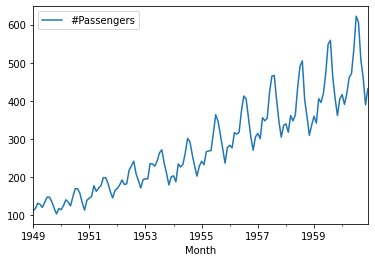

In [15]:
data.plot()

Step 1 interpretation: 
1. Seasonality is present - peaks and noise occuring regularly
2. Trend is present - Trend is a pattern in data that shows movement of series in higher or lower values with respect to time. In this case, we see that, every year, there is an increase in number of passengers


In [16]:
# Step 2 - now, check if the timesetries is stationary or not
# If data is not changing with respect to time, it is stationary
from statsmodels.tsa.seasonal import seasonal_decompose

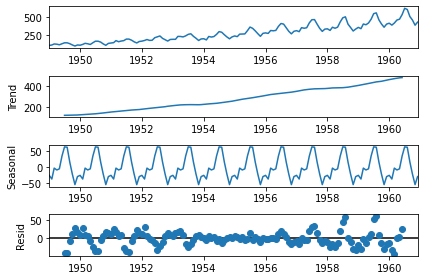

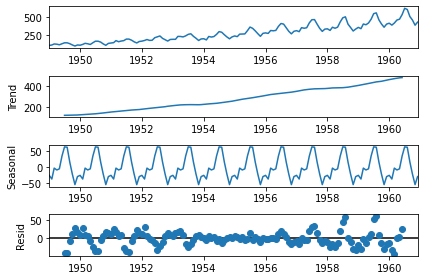

In [17]:
dec_r = seasonal_decompose(data)
dec_r.plot()
# Plot to see details of the data

In [18]:
# Check stationarity of the data
#stationary if statistical properties (mean, variance) do not change with respect
# non-stationary if stat. properties change with respect to time
# Will do ADF (Augmented Dickie Fuller Test) to determine stationarity
# will check p-value:
# if greater than 0.05, time series will be considered as non-stationary
# if less than 0.05, time series will be considered as stationary.
# It will be good to ensure that the time series is stationary.
# Our NULL Hypothesis (H0) - time-series is a non-stationary
# Alternate Hypothesis (H1) : time series is stationary

from statsmodels.tsa.stattools import adfuller


In [19]:
result = adfuller(data['#Passengers'])
print(result)

(0.8153688792060472, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


In [20]:
# from the value of result:
#1st param ADF Stats
# 2nd Param is p-value 
print('ADF Stats : ', result[0])
print('p-value : ', result[1])

ADF Stats :  0.8153688792060472
p-value :  0.991880243437641


In [21]:
# So, p-value is 0.99 which is > 0.05. We accept Null Hypothesis H0.
# The time series is non-stationary
# We need to find a way to make the series stationary.
# Can use many techniques: we will remove Trend using rolling mean Differencing
# we will be using a window

rolling_mean = data.rolling(window=12).mean()
# Use 12 for 12 months in a year and setting up rolling window

# The first 12 months in 1949 will have NaN values since we are having rolling mean for 12 months.
# The first entry will be for 1950-Jan which will habe mean of 1949 - entire year
# and so on...
rolling_mean

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


In [22]:
# We will detrending the timeseries
rolling_mean_detrended = data - rolling_mean

In [23]:
rolling_mean_detrended

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,142.666667
1960-09-01,40.916667
1960-10-01,-10.583333


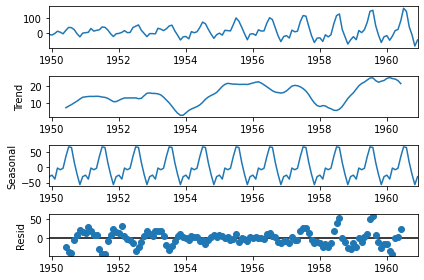

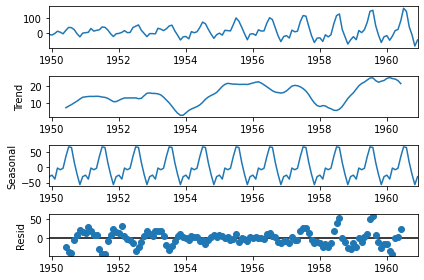

In [24]:
# Let us plot again to see the decomposition
# have to drop the NaN's to plot.
dec_r = seasonal_decompose(rolling_mean_detrended.dropna())
dec_r.plot()
# Plot to see details of the data

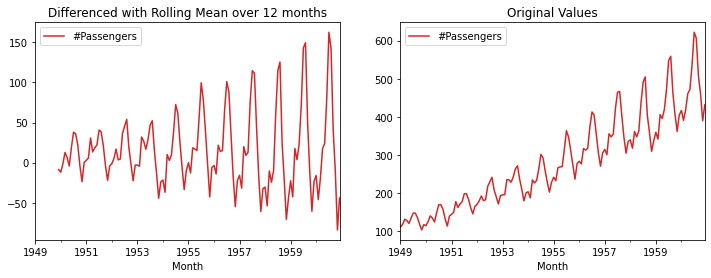

In [25]:
ax1 = plt.subplot(121)
rolling_mean_detrended.plot(figsize=(12,4), color='tab:red',
                            title='Differenced with Rolling Mean over 12 months',
                            ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4), color='tab:red',
          title='Original Values',
          ax=ax2)

In [26]:
# Now, we deal with seasonality
# We will shift the observations by 1 and then perform 2nd order Differencing
rolling_mean_detrended.shift()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,162.583333
1960-09-01,142.666667
1960-10-01,40.916667


In [27]:
# Can see the values shift by 1 month (check the value of rolling_mean_detrended 
# before for 1960-11-01 that is now appearing for 1960-12-01)
# THe following will be the effect of 2nd order differential
rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift()

In [28]:
rolling_mean_detrended_diff

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,-19.916667
1960-09-01,-101.750000
1960-10-01,-51.500000


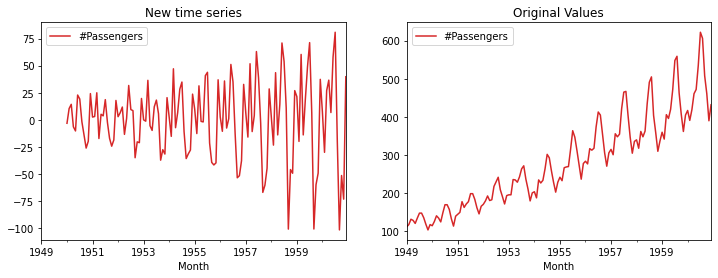

In [30]:
# Let us visualize now
ax1=plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4), color='tab:red',
                            title='New time series',
                            ax=ax1)

ax2 = plt.subplot(122)
data.plot(figsize=(12,4), color='tab:red',
          title='Original Values',
          ax=ax2)

In [31]:
result1 = adfuller(rolling_mean_detrended_diff['#Passengers'].dropna())
result1

(-3.1544826348635744,
 0.022775264967859313,
 12,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 908.7516655845259)

In [32]:
print('ADF Stats : ', result1[0])
print('p-value : ', result1[1])

ADF Stats :  -3.1544826348635744
p-value :  0.022775264967859313


In [ ]:
# Based on this, we can now reject the NULL Hypothesis and accepted
# ALternate Hypothesis - the series is now stationary

In [33]:
# Now, we calculate Auto Correlations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# rolling_mean_detrended_diff['#Passengers'] = rolling_mean_detrended_diff['#Passengers'].dropna()

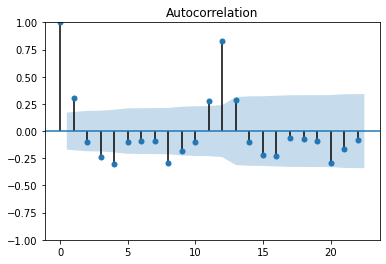

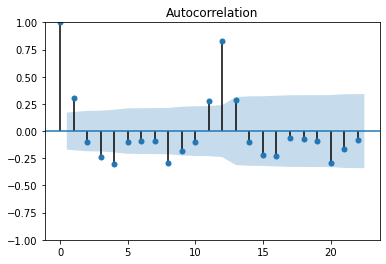

In [34]:
plot_acf(rolling_mean_detrended_diff['#Passengers'].dropna())

In [ ]:
#pip install pmdarima

In [35]:
from pmdarima import auto_arima

In [36]:
# Trace = True will give us all the info computed
# Will give the besty model to be described to get the value of P, D, Q
order = auto_arima(rolling_mean_detrended_diff['#Passengers'].dropna(), trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1314.475, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1303.387, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1298.888, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1312.483, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1295.760, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1297.960, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.290, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1293.760, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1296.888, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1301.389, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0

In [37]:
# We have seasonality. We should run Seasonal Arima onto this and use the PDQ values from
# the ARIMA model we just ran
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
 

In [39]:
rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()

TypeError: ignored

In [40]:
rolling_mean_detrended_diff.shape

(132, 1)

In [41]:
# Create train and test data - use 120 / 132 for train and 12/132 for test
train=rolling_mean_detrended_diff.iloc[:120]['#Passengers']
test= rolling_mean_detrended_diff.iloc[121:]['#Passengers']

In [42]:
# Now, we canbuild our model
# Seasonal order happens every 12 months (every year). So, we provide 12 as parameter fro
# seasonality
sky = SARIMAX(train, order=(3,0,3), seasonal_order=(3,0,3,12)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting 

In [43]:
# Now, we do the prediction for next 5 yrs using the model
# steps parameter in forecast : for 5 yrs, we need 12 months *5 yrs = 60 since the data is 
# on a monthly basis
p_5= sky.forecast(steps=60)
p_5

1960-01-01    16.776676
1960-02-01   -21.516335
1960-03-01    49.557198
1960-04-01   -16.473849
1960-05-01    19.941700
1960-06-01    46.846268
1960-07-01    64.491575
1960-08-01     6.904598
1960-09-01   -97.109144
1960-10-01   -57.313797
1960-11-01   -46.325753
1960-12-01    34.646249
1961-01-01    17.019076
1961-02-01   -20.446362
1961-03-01    48.910996
1961-04-01   -15.079506
1961-05-01    17.782639
1961-06-01    45.851440
1961-07-01    62.485730
1961-08-01     6.000465
1961-09-01   -92.520083
1961-10-01   -56.336037
1961-11-01   -45.613001
1961-12-01    34.033781
1962-01-01    14.692250
1962-02-01   -20.269027
1962-03-01    46.006692
1962-04-01   -15.027839
1962-05-01    17.877588
1962-06-01    44.854263
1962-07-01    59.975196
1962-08-01     6.670570
1962-09-01   -91.117782
1962-10-01   -52.729276
1962-11-01   -43.789455
1962-12-01    32.056154
1963-01-01    16.147214
1963-02-01   -19.066897
1963-03-01    46.533084
1963-04-01   -14.204733
1963-05-01    17.077792
1963-06-01    42

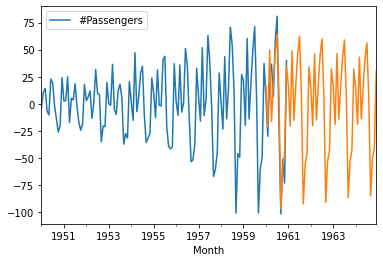

In [44]:
rolling_mean_detrended_diff.plot()
p_5.plot()

In [ ]:
# The orange color grpahs show the forecasted values for the next 5 yrs.

In [ ]:
# 2 exercises as homework:
1. Transform - p_5 is in the form of time series forecasted data. How will you transform this back to the 
original data in terms of # of customers. Tip: Use pandas functionaly Offset, use Integrations
2. Calculate the accuracy of the predicted values.